In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [2]:
xr.__version__

'0.14.0'

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [7]:
ds =  xr.tutorial.open_dataset("air_temperature")
ds.air.groupby('lat').apply(np.mean, keep_attrs=True)


TypeError: mean() got an unexpected keyword argument 'keep_attrs'

In [2]:
all_variables_3L = xr.open_dataset('all_variables_3L_aug2020.nc')

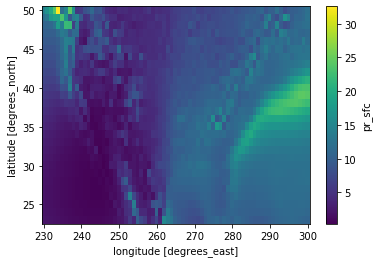

In [146]:
all_variables_3L.mean('M').mean('S').mean('time').pr_sfc.plot()

In [3]:
all_variables_T3 = all_variables_3L.stack(St=('S','time'))
all_variables_T3 = all_variables_T3.swap_dims({'St':'target_time'})
all_variables_T3 = all_variables_T3.unstack()


In [4]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.

In [5]:
target_all = pd.date_range('1900-01-01', periods=365, freq='D')
target_all = [pd.DatetimeIndex([it]) for it in target_all]


In [6]:
from scipy import stats
def plot_qqplot(dain, dain1, ax1, ax2):
    
#     ylen = dsin.pr_sfc.shape[0]
#     print(ylen)
#     prob = np.arange(1,ylen+1)/(ylen+1)
    x = np.sort(dain.pr_sfc.values.ravel())
    x[x<1e-4]=0
    x = x[x>0]
    x /=np.mean(x)
    x = np.log(x)
    x1 = np.sort(dain1.pr_sfc.values.ravel())
    x1[x1<1e-4]=0
    x1 = x1[x1>0]
    x1 /=np.mean(x1)
    x1 = np.log(x1)
#     plt.figure()
#     ax = plt.subplot(111)
#     lex = len(x)
#     lex1 = len(x1)
#     print(lex,lex1, x.shape, x1.shape)
#     if lex>lex1:
#         diffx = lex-lex1
#         x = x[diffx:]
#     elif (lex1)>(lex ):
#         diffx = lex1-lex
#         x1 = x1[diffx:]
#     print(np.atleast_2d(x).shape, x1.shape)
    out = stats.anderson_ksamp([x,x1])
    stats.probplot(x, plot=ax1)
    stats.probplot(x1, plot=ax1)
    pause
#     if out.statistic>out.critical_values[3]:
#         stats.probplot(x, plot=ax1)
#     else:
#         stats.probplot(x, plot=ax2)

#     print()
#     return xr.DataArray(out)

In [7]:

# x = np.sort(temp4.sel(allpoints=iap).pr_sfc.values.ravel())
# x[x<1e-4]=0
# x = x[x>0]
# x /=np.mean(x)
# x = np.log(x)

DatetimeIndex(['1900-01-01'], dtype='datetime64[ns]', freq=None)
<xarray.DataArray 'pr_sfc' (allpoints: 1988)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 50.0 50.0 50.0 50.0 ... 23.0 23.0 23.0 23.0
  - lon        (allpoints) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
<xarray.DataArray 'pr_sfc' (allpoints: 1988)>
array([nan, nan, nan, ...,  1.,  1.,  1.], dtype=float32)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 34.0 42.0 23.0 45.0 ... 39.0 43.0 44.0 48.0
  - lon        (allpoints) float64 294.0 294.0 264.0 230.0 ... 242.0 252.0 268.0
(49.0, 237.0)
1
1
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
1062
10

(44.0, 261.0)
236
(44.0, 262.0)
237
(44.0, 263.0)
238
(44.0, 264.0)
239
(44.0, 265.0)
240
(44.0, 266.0)
241
(44.0, 267.0)
242
(44.0, 268.0)
243
(44.0, 269.0)
244
(44.0, 270.0)
245
(44.0, 271.0)
246
(44.0, 272.0)
247
(44.0, 273.0)
248
(44.0, 274.0)
249
(44.0, 275.0)
250
(44.0, 276.0)
251
(44.0, 277.0)
252
(44.0, 278.0)
253
(44.0, 282.0)
254
(44.0, 283.0)
255
(44.0, 284.0)
256
(44.0, 285.0)
257
(44.0, 286.0)
258
(44.0, 287.0)
259
(44.0, 288.0)
260
(44.0, 289.0)
261
(44.0, 290.0)
262
(44.0, 291.0)
263
(43.0, 236.0)
264
(43.0, 237.0)
265
(43.0, 238.0)
266
(43.0, 239.0)
267
(43.0, 240.0)
268
(43.0, 241.0)
269
(43.0, 242.0)
270
(43.0, 243.0)
271
(43.0, 244.0)
272
(43.0, 245.0)
273
(43.0, 246.0)
274
(43.0, 247.0)
275
(43.0, 248.0)
276
(43.0, 249.0)
277
(43.0, 250.0)
278
(43.0, 251.0)
279
(43.0, 252.0)
280
(43.0, 253.0)
281
(43.0, 254.0)
282
(43.0, 255.0)
283
(43.0, 256.0)
284
(43.0, 257.0)
285
(43.0, 258.0)
286
(43.0, 259.0)
287
(43.0, 260.0)
288
(43.0, 261.0)
289
(43.0, 262.0)
290
(43.0, 263

(33.0, 263.0)
780
(33.0, 264.0)
781
(33.0, 265.0)
782
(33.0, 266.0)
783
(33.0, 267.0)
784
(33.0, 268.0)
785
(33.0, 269.0)
786
(33.0, 270.0)
787
(33.0, 271.0)
788
(33.0, 272.0)
789
(33.0, 273.0)
790
(33.0, 274.0)
791
(33.0, 275.0)
792
(33.0, 276.0)
793
(33.0, 277.0)
794
(33.0, 278.0)
795
(33.0, 279.0)
796
(33.0, 280.0)
797
(33.0, 281.0)
798
(32.0, 245.0)
799
(32.0, 246.0)
800
(32.0, 247.0)
801
(32.0, 248.0)
802
(32.0, 249.0)
803
(32.0, 250.0)
804
(32.0, 251.0)
805
(32.0, 252.0)
806
(32.0, 253.0)
807
(32.0, 254.0)
808
(32.0, 255.0)
809
(32.0, 256.0)
810
(32.0, 257.0)
811
(32.0, 258.0)
812
(32.0, 259.0)
813
(32.0, 260.0)
814
(32.0, 261.0)
815
(32.0, 262.0)
816
(32.0, 263.0)
817
(32.0, 264.0)
818
(32.0, 265.0)
819
(32.0, 266.0)
820
(32.0, 267.0)
821
(32.0, 268.0)
822
(32.0, 269.0)
823
(32.0, 270.0)
824
(32.0, 271.0)
825
(32.0, 272.0)
826
(32.0, 273.0)
827
(32.0, 274.0)
828
(32.0, 275.0)
829
(32.0, 276.0)
830
(32.0, 277.0)
831
(32.0, 278.0)
832
(32.0, 279.0)
833
(32.0, 280.0)
834
(31.0, 249

NameError: name 'pause' is not defined

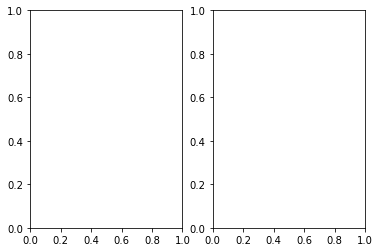

In [211]:
# looping through the target dates for climatologies
import warnings
warnings.filterwarnings("ignore")
maskstack = ds_mask.the_geom.stack(allpoints=['lat','lon']) 
# ds_clim_test_3d_all = []
for iT in target_all:
    print(iT,)
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True).where(ds_mask.the_geom>0.2)
    
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
    firststep=0
    for different_lead1, different_lead2 in zip(np.array([4])-1, np.array([33])-1 ):
        firststep+=1
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        temp3 = temp2.stack(Mtt=('M','target_time'))
#         temp3 = temp3.load()
#         print(temp3.pr_sfc.values.shape)
        temp4 = temp3.stack(allpoints=['lat','lon']) 
        temp4 = temp4.drop('St')
        temp4 = temp4.drop('Mtt')
        counter = 0
        plt.figure()
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)
        temp5 = temp4.pr_sfc[0]*0.+1.
        print(temp5)
        temp5 = temp5.where(maskstack>0.2)
        print(temp5)

        iiap = 0
        counter = 0
        for iap in temp4.allpoints.values:
            if np.isnan(temp5.sel(allpoints=iap).values)==False:
                print(iap)
                counter+=1
                print(counter)
                if counter==1:
                    print(counter)
                    for iap1 in temp4.allpoints.values:
                        if iap!=iap1:
                            if np.isnan(temp5.sel(allpoints=iap1).values)==False:
#                                 print(iap1)
                                mappa = plot_samedistr(temp4.sel(allpoints=iap),temp4.sel(allpoints=iap1), ax1, ax2, iiap)
                                temp5.loc[dict(allpoints=iap1)]=mappa+1
                                print(np.argwhere(np.isnan(temp5.values)).shape[0])
                                
                elif counter>1:
                    while np.argwhere(np.isnan(temp5.values)).shape[0]==0:
                        print('while',np.argwhere(np.isnan(temp5.values)).shape)
                        which1 = np.argwhere(temp5.values==0)
                        print(which1)
                        iiap = which1[0]
                        iap = temp4.allpoints.values[iiap]
                        for iap1 in temp4.allpoints.values[which1]:
                            if iap!=iap1:
                                mappa = plot_samedistr(temp4.sel(allpoints=iap),temp4.sel(allpoints=iap1), ax1, ax2, iiap)
                                print('mappa',mappa)
                                temp5.loc[dict(allpoints=iap1)]=mappa+1
            
        
#                 if counter>40:
#                     pause
                
        pause
#         temp4.groupby('allpoints').apply(plot_qqplot)

#         print(temp3.pr_sfc.shape())
#         temp3 = temp3.quantile(dim=['Mtt'], q=[0.15,0.33,0.5,0.667,0.85])
#         temp3 = temp3.expand_dims('Lbeg')
#         temp3.coords['Lbeg'] = 'Lbeg', [np.str(different_lead1+1)+'-'+np.str(different_lead2+1)] #np.atleast_1d(different_lead1+1)
# #         print(temp3)
# #         if different_lead1==3: #whatever first value of different_lead1
#         if firststep==1: #whatever first value of different_lead1
#             ds_quantile = temp3*1.
#         else:
#             ds_quantile = xr.merge([ds_quantile,temp3])
#     ds_quantile = ds_quantile.expand_dims('target_clim')
#     ds_quantile.coords['target_clim'] = 'target_clim', np.atleast_1d(iT)
#     ds_clim_test_3d_all.append(ds_quantile)
# ds_clim_test_3d_all = xr.combine_by_coords(ds_clim_test_3d_all)    


In [116]:
from scipy import stats
def plot_samedistr(dain, dain1, ax1, ax2,iiap):
    
    x = np.sort(dain.pr_sfc.values.ravel())
    x[x<1e-4]=0
    x = x[x>0]
    x /=np.mean(x)
    x = np.log(x)
    x1 = np.sort(dain1.pr_sfc.values.ravel())
    x1[x1<1e-4]=0
    x1 = x1[x1>0]
    x1 /=np.mean(x1)
    x1 = np.log(x1)

    out = stats.anderson_ksamp([x,x1])
    if out.significance_level>0.05:
        group = iiap-1
#         stats.probplot(x, plot=ax1)
#         stats.probplot(x1, plot=ax1)
    else:
        group = -1
        
    return group#xr.DataArray(group)
#     if out.statistic>out.critical_values[3]:
#         stats.probplot(x, plot=ax1)
#     else:
#         stats.probplot(x, plot=ax2)

#     print()
#     return xr.DataArray(out)

In [124]:
# looping through the target dates for climatologies
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
maskstack = ds_mask.the_geom.stack(allpoints=['lat','lon']) 
# ds_clim_test_3d_all = []
zones=[]
P0all = []
P0empall=[]
mall = []
s2all = []
meanx = []
for iT in target_all:
    print(iT,)
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True).where(ds_mask.the_geom>0.2)
    
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
    firststep=0
    for different_lead1, different_lead2 in zip(np.array([4])-1, np.array([33])-1 ):
        firststep+=1
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        temp3 = temp2.stack(Mtt=('M','target_time'))
#         temp3 = temp3.load()
#         print(temp3.pr_sfc.values.shape)
        temp4 = temp3.stack(allpoints=['lat','lon']) 
        temp4 = temp4.drop('St')
        temp4 = temp4.drop('Mtt')
        counter = 0
        
        temp5 = temp4.pr_sfc[0]*0.
        tempP0 = temp4.pr_sfc[0]*0.
        tempP0emp = temp4.pr_sfc[0]*0.
        tempm = temp4.pr_sfc[0]*0.
        temps2 = temp4.pr_sfc[0]*0.
        tempmx = temp4.pr_sfc[0]*0.
#         print(temp5)
#         temp5 = temp5.where(maskstack>0.2)
#         print(temp5)
        counter=0
        cc = 0
#         print(np.argwhere(temp5.values==0).shape[0])
        while np.argwhere(temp5.values==0).shape[0]>cc:
#             print('while1',np.argwhere(temp5.values==0).shape[0])
            which1 = np.argwhere(temp5.values==0)
            if counter>0:                
                if which1[0]==which2[0]:
                    temp5[dict(allpoints=which2[0])]=5000
                    which1 = np.argwhere(temp5.values==0)
                    which1=which1[1:]   
#                     print('here')
#                     print('while2',np.argwhere(temp5.values==0).shape[0])
                    cc +=1
            counter+=1
            iiap = which1.ravel()[0]
#             print(iiap)
            pool=[]
            if np.sum(np.isnan(temp4.isel(allpoints=iiap).pr_sfc.values))==0:
                x1 = np.sort(temp4.isel(allpoints=iiap).pr_sfc.values.ravel())
                x1[x1<1e-4]=0
                x1 = x1[x1>0]
                x1 /=np.mean(x1)
                x1 = np.log(x1)
                pool.append(x1)
#                 plt.figure()
#                 ax1 = plt.subplot(121)
#                 ax2 = plt.subplot(122)
#                 print( '1')
                counthowmany=0.
                for iiap1 in which1.ravel():
#                     print('2')
                    if iiap!=iiap1:
#                         print('3')
                        if np.sum(np.isnan(temp4.isel(allpoints=iiap1).pr_sfc.values))==0:
#                             print('4')
                            mappa = plot_samedistr(temp4.isel(allpoints=iiap),temp4.isel(allpoints=iiap1), ax1, ax2, iiap)
                            if mappa>-1:
                                temp5[dict(allpoints=iiap1)]=mappa+1
                                counthowmany+=1.
                                x1 = np.sort(temp4.isel(allpoints=iiap1).pr_sfc.values.ravel())
                                x1[x1<1e-4]=0
                                tempP0emp[dict(allpoints=iiap1)]=np.sum(x1==0)/len(x1)
                                x1 = x1[x1>0]
                                tempmx[dict(allpoints=iiap1)]=np.mean(x1)
                                x1 /=np.mean(x1)                              
                                x1 = np.log(x1)
                                pool.append(x1)                

                which2 = np.argwhere(temp5.values==0)
#                 plt.title(np.str(temp4.isel(allpoints=iiap).allpoints.values)+np.str(counthowmany))
                fitvalues = np.exp(np.concatenate(pool))
#                 stats.probplot(np.log(fitvalues), plot=ax2)
                mu1 = np.mean(fitvalues)
                mu2 = np.mean(fitvalues**2)
                mu3 = np.mean(fitvalues**3)
                P0 = 1 - mu3*((mu1/mu2)**3)
                m = np.log((mu2**4)/((mu3**(3/2))*(mu1**(5/2))))
                s2 = np.log(mu3*mu1/(mu2**2))
                tempm = xr.where(temp5==iiap,m*1,tempm)
                temps2 = xr.where(temp5==iiap,s2*1,temps2)
                tempP0 = xr.where(temp5==iiap,P0*1,tempP0)
#                 plotrange = np.arange(-4, 4.1, 0.1)
#                 ax2.plot(stats.norm.ppf((P0+(1-P0)*stats.norm.cdf((plotrange-m)/(s2**0.5)))),
#                          plotrange, 'r.')

    temp5 = temp5.expand_dims('target_time')
    temp5.coords['target_time'] = iT
    tempmx = tempmx.expand_dims('target_time')
    tempmx.coords['target_time'] = iT
    tempm = tempm.expand_dims('target_time')
    tempm.coords['target_time'] = iT
    temps2 = temps2.expand_dims('target_time')
    temps2.coords['target_time'] = iT
    tempP0 = tempP0.expand_dims('target_time')
    tempP0.coords['target_time'] = iT
    tempP0emp = tempP0emp.expand_dims('target_time')
    tempP0emp.coords['target_time'] = iT
    zones.append(temp5)
    P0all.append(tempP0)
    P0empall.append(tempP0emp)
    mall.append(tempm)
    s2all.append(temps2)
    meanx.append(tempmx)

        

#     ds_quantile.coords['target_clim'] = 'target_clim', np.atleast_1d(iT)
#     ds_clim_test_3d_all.append(ds_quantile)
# ds_clim_test_3d_all = xr.combine_by_coords(ds_clim_test_3d_all)    


DatetimeIndex(['1900-01-01'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-02'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-04'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-05'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-06'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-07'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-10'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-11'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-1

DatetimeIndex(['1900-05-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-10'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-11'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-16'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-19'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-20'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-21'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-22'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-2

DatetimeIndex(['1900-09-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-16'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-19'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-20'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-21'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-22'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-23'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-24'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-25'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-26'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-2

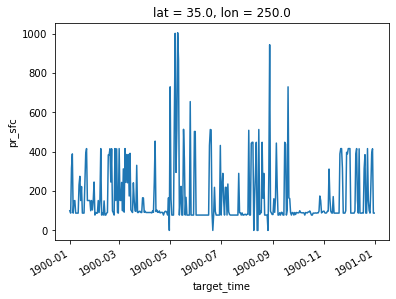

In [137]:
xr.concat(zones, dim='target_time').unstack()[:,15,20].plot()

In [112]:
# tempm.loc[dict(temp5=iiap)] = m*1.
tempm = xr.where(temp5==iiap,m*1,tempm)

In [99]:
m

0.14621658025041784

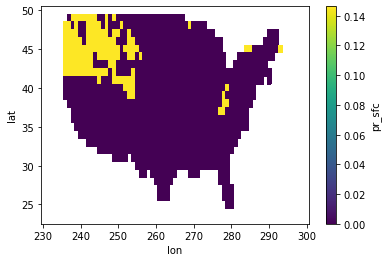

In [113]:
tempm.unstack().plot()

In [110]:
temp5.max()

<xarray.DataArray 'pr_sfc' ()>
array(78.)

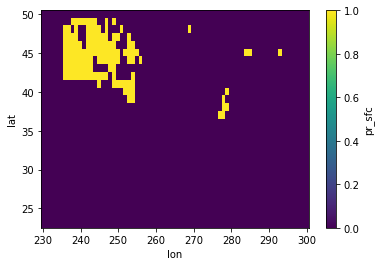

In [111]:
(temp5==iiap).unstack().plot()

In [81]:
tempm.loc[dict(temp5==iiap)]

TypeError: cannot convert dictionary update sequence element #0 to a sequence

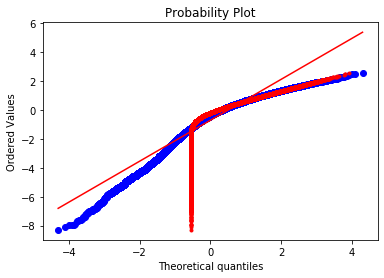

array([0.40772477, 0.40941607, 0.41077014, ..., 1.        , 1.        ,
       1.        ])

In [46]:
((-mu3)**(3/2))

22.280104461222837

In [ ]:
F = P0+(1-P0)*sp.s

In [54]:
s2

0.3895387108697506

In [32]:
P0

0.8473338100923617

In [33]:
m

nan

In [29]:
np.concatenate(pool).shape

(84966,)

((array([-4.31013075, -4.10977835, -4.00074777, ...,  4.00074777,
          4.10977835,  4.31013075]),
  array([-8.294826 , -8.109024 , -7.979571 , ...,  2.4809089,  2.4819136,
          2.5488145], dtype=float32)),
 (1.4140811539780012, -0.7066672444343561, 0.9675085604390847))

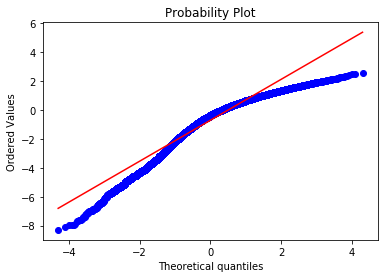

In [27]:
stats.probplot(np.concatenate(pool), plot=plt)


In [314]:
np.str(temp4.isel(allpoints=iiap).allpoints.values)

'(49.0, 237.0)'

In [305]:
temp4.isel(allpoints=iiap)

<xarray.Dataset>
Dimensions:    (Mtt: 750)
Coordinates:
    allpoints  object (25.0, 280.0)
Dimensions without coordinates: Mtt
Data variables:
    pr_sfc     (Mtt) float32 0.39999926 2.3999984 5.200001 ... 8.699999 19.8

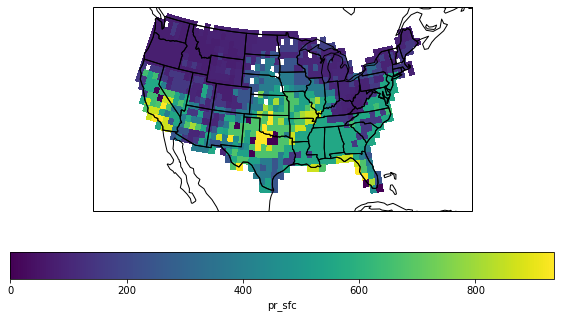

In [79]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.figure(figsize=(10,5))
ax = plt.subplot(111,projection=ccrs.LambertConformal(central_longitude=-95, central_latitude=45) )

temp5.unstack().where(temp5.unstack()<5000).plot(zorder=-1, transform=ccrs.PlateCarree(),
                    cbar_kwargs=dict(orientation='horizontal', fraction=0.1))
ax.coastlines()
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.BORDERS)
ax.add_geometries(
shpreader.Reader(states_shp).geometries(),
ccrs.PlateCarree(),
facecolor='none', edgecolor='k')
#         ax.stock_img(name='ne_shaded')

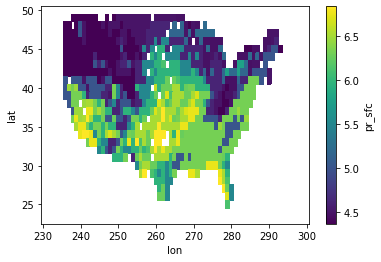

In [77]:
np.log(temp5.unstack().where(temp5.unstack()<5000)).plot()

In [275]:
np.(np.unique(temp5.values)!=np.nan)

AttributeError: module 'numpy' has no attribute 'count'

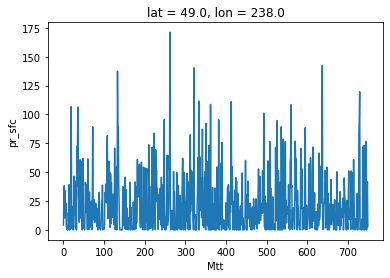

In [249]:
temp4.unstack().sel(lat=49, lon=238).pr_sfc.plot()

In [165]:
temp4.sel(allpoints=iap1)

<xarray.Dataset>
Dimensions:    (Mtt: 750, allpoints: 1)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 50.0
  - lon        (allpoints) float64 231.0
Dimensions without coordinates: Mtt
Data variables:
    pr_sfc     (Mtt, allpoints) float32 nan nan nan nan nan ... nan nan nan nan

In [162]:
temp4.pr_sfc

<xarray.DataArray 'pr_sfc' (Mtt: 750, allpoints: 1988)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 50.0 50.0 50.0 50.0 ... 23.0 23.0 23.0 23.0
  - lon        (allpoints) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
Dimensions without coordinates: Mtt

<xarray.Dataset>
Dimensions:   (lat: 28, lon: 71)
Coordinates:
  * lat       (lat) float32 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon       (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
Data variables:
    the_geom  (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Conventions:  IRIDL

In [159]:
temp4.pr_sfc

<xarray.DataArray 'pr_sfc' (Mtt: 750, allpoints: 1988)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 50.0 50.0 50.0 50.0 ... 23.0 23.0 23.0 23.0
  - lon        (allpoints) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
Dimensions without coordinates: Mtt

False

In [149]:
temp5

<xarray.DataArray 'pr_sfc' (allpoints: 1988)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 50.0 50.0 50.0 50.0 ... 23.0 23.0 23.0 23.0
  - lon        (allpoints) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0

In [139]:
np.argwhere(np.isnan(temp5.values))

array([[   3],
       [   5],
       [   6],
       ...,
       [1985],
       [1986],
       [1987]])

In [140]:
temp5

<xarray.DataArray 'pr_sfc' (allpoints: 1988)>
array([ 1.,  0.,  0., ..., nan, nan, nan], dtype=float32)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 50.0 50.0 50.0 50.0 ... 23.0 23.0 23.0 23.0
  - lon        (allpoints) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0

In [109]:
temp5.values

array([ 1.,  0.,  0., ..., nan, nan, nan], dtype=float32)

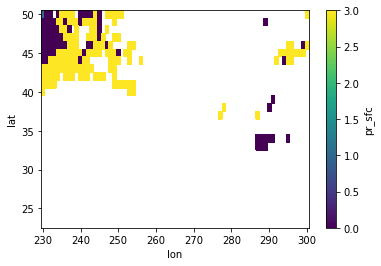

In [143]:
temp5.unstack().plot()